In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Linear regression line can be fit as follows.
1. calculate the mean of the data : sum of data points / number of data points
2. y = mx + c passes through mean.
3. value of m is given by : r*(sample std dev y/sample std dev x), where r is correlation coefficient.
4. substitute r, m, x and y to get c.

In [6]:
#means
def mean(values):
    return sum(values)/float(len(values))

In [7]:
# sdev - standard deviation
def sdev(values):
    m = mean(values)
    s = 0.0
    for i in values:
        s = s + (i-m)**2
    s = s/len(values)
    s = math.sqrt(s)
    return s

In [8]:
# r - correlation coeficient ; m = r*(sdevY/sdevX); c
def coeff(X, Y):
    #X = [row[0] for row in dataset]
    #Y = [row[1] for row in dataset]
    sdevX = sdev(X)
    sdevY = sdev(Y)
    meanX = mean(X)
    meanY = mean(Y)
    r = 0.0
    for i in range(0, len(X)):
        #print('X value', X[i])
        r = r + ((X[i]-meanX)/float(sdevX))*((Y[i]-meanY)/float(sdevY))
    r = r/(len(X)-1)
    #print('r = ', r)
    return [r*(sdevY/sdevX), (meanY - r*(sdevY/sdevX)*meanX)]

In [109]:
class linear_regression:
    #def __init__(self):
    #   self.m = 0.0
    #   self.c = 0.0
    #   self.predictions = []
    m=0.0
    c=0.0
    predictions = []
    def fit(self, X_train, y_train):
        m, c = coeff(X_train, y_train)
        self.m, self.c = m, c
        return m, c
    def predict(self, X_test):
        self.predictions = []
        for row in X_test:
            yhat = self.m*row + self.c
            self.predictions.append(yhat)
        send = self.predictions
        self.predictions = []
        return send
    

In [194]:
#Creating regression friendly dummy data
from sklearn.datasets import make_regression
X, y = make_regression(n_features = 1, n_samples = 1000, noise = 15, bias = 0.2)
plt.scatter(X, y)
plt.show()

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
lr = linear_regression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

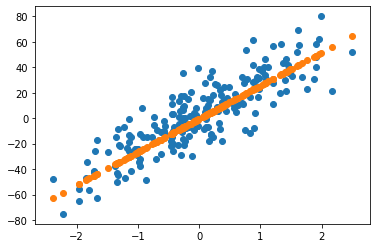

In [198]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, predictions)
plt.show()